In [16]:
import sys, os
from pathlib import Path  # NOVO

current_dir = os.getcwd()
project_root = current_dir

while not os.path.isdir(os.path.join(project_root, "src")) and project_root != "/":
    project_root = os.path.dirname(project_root)

sys.path.append(project_root)
print("Project root:", project_root)

# NOVO: diretórios de saída
PROJECT_ROOT = Path(project_root)
REPORTS_DIR = PROJECT_ROOT / "reports"
TRENDZ_DIR = PROJECT_ROOT / "trendz"

REPORTS_DIR.mkdir(exist_ok=True)
TRENDZ_DIR.mkdir(exist_ok=True)

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.load_data import load_csv

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


Project root: /Users/guilhermealencar/ml-syphilis-congenita


In [2]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.load_data import load_csv

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [3]:
df = load_csv("../data/raw/data_set.csv")
print(df.shape)
df.head()


[OK] Dataset carregado com 41762 linhas e 26 colunas.
(41762, 26)


,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


In [4]:
df.loc[df["AGE"] < 0, "AGE"] = np.nan
df["AGE"] = df["AGE"].fillna(df["AGE"].median())
print("AGE pronto!")


AGE pronto!


In [5]:
target_col = "VDRL_RESULT"

X = df.drop(columns=[target_col])
y = df[target_col]

num_cols = ["AGE", "NUM_RES_HOUSEHOLD", "NUM_LIV_CHILDREN",
            "NUM_ABORTIONS", "NUM_PREGNANCIES"]

cat_cols = [c for c in X.columns if c not in num_cols]

print("Num:", num_cols)
print("Cat:", len(cat_cols))


Num: ['AGE', 'NUM_RES_HOUSEHOLD', 'NUM_LIV_CHILDREN', 'NUM_ABORTIONS', 'NUM_PREGNANCIES']
Cat: 20


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Test shape:", X_test.shape)


Test shape: (8353, 25)


In [7]:
model_path = "../models/best_model_rf.pkl"

if not os.path.exists(model_path):
    raise FileNotFoundError("Modelo não encontrado! Treine no 03 primeiro.")

model = joblib.load(model_path)
model


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [8]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Avaliação pronta para gerar métricas.")


Avaliação pronta para gerar métricas.


In [9]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.05      0.06      0.05       165
         1.0       0.98      0.98      0.98      8188

    accuracy                           0.96      8353
   macro avg       0.51      0.52      0.52      8353
weighted avg       0.96      0.96      0.96      8353



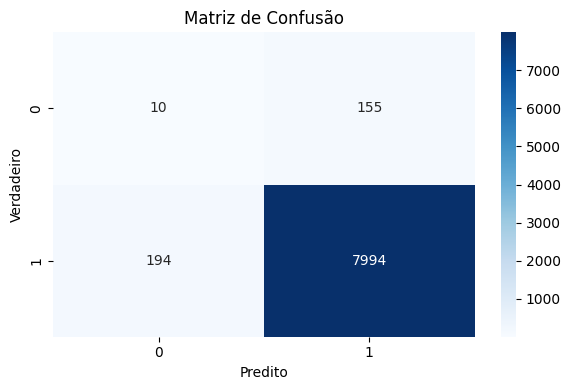

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")

plt.tight_layout()
plt.savefig(REPORTS_DIR / "05_matriz_confusao.png", dpi=300, bbox_inches="tight")  # NOVO

plt.show()


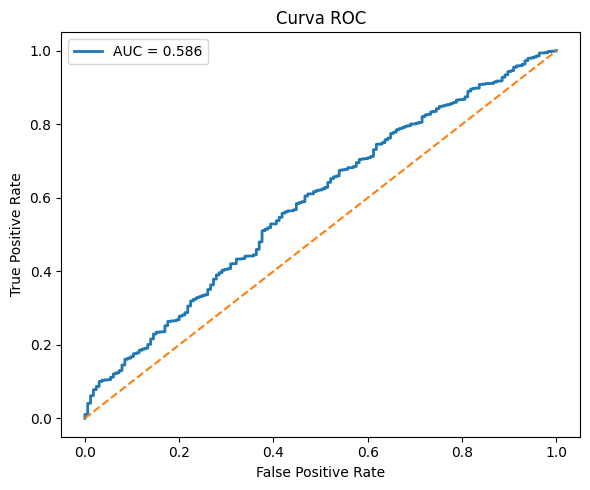

AUC: 0.5862307737857322


In [19]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()

plt.tight_layout()
plt.savefig(REPORTS_DIR / "06_curva_roc.png", dpi=300, bbox_inches="tight")  # NOVO

plt.show()

print("AUC:", roc_auc)


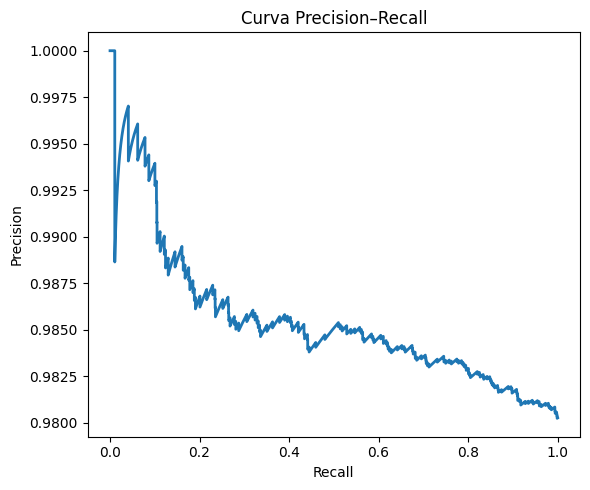

In [20]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall")

plt.tight_layout()
plt.savefig(REPORTS_DIR / "07_curva_precision_recall.png", dpi=300, bbox_inches="tight")  # NOVO

plt.show()


In [13]:
model_rf = model.named_steps["model"]
preprocess = model.named_steps["preprocess"]

# Nomes das colunas numéricas
numeric_features = num_cols

# Nomes das colunas categóricas pós-one-hot
cat_feature_names = preprocess.named_transformers_["cat"]\
    .named_steps["onehot"].get_feature_names_out(cat_cols)

all_features = np.concatenate([numeric_features, cat_feature_names])

importances = model_rf.feature_importances_

feat_imp = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values("importance", ascending=False)

feat_imp.head(20)


,feature,importance
0,AGE,0.064424
4,NUM_PREGNANCIES,0.040919
2,NUM_LIV_CHILDREN,0.035709
1,NUM_RES_HOUSEHOLD,0.035626
3,NUM_ABORTIONS,0.030464
32,MARITAL_STATUS_1.0,0.023350
37,FOOD_INSECURITY_0.0,0.022419
56,LEVEL_SCHOOLING_5.0,0.021803
39,FOOD_INSECURITY_2.0,0.020809
36,MARITAL_STATUS_5.0,0.018293


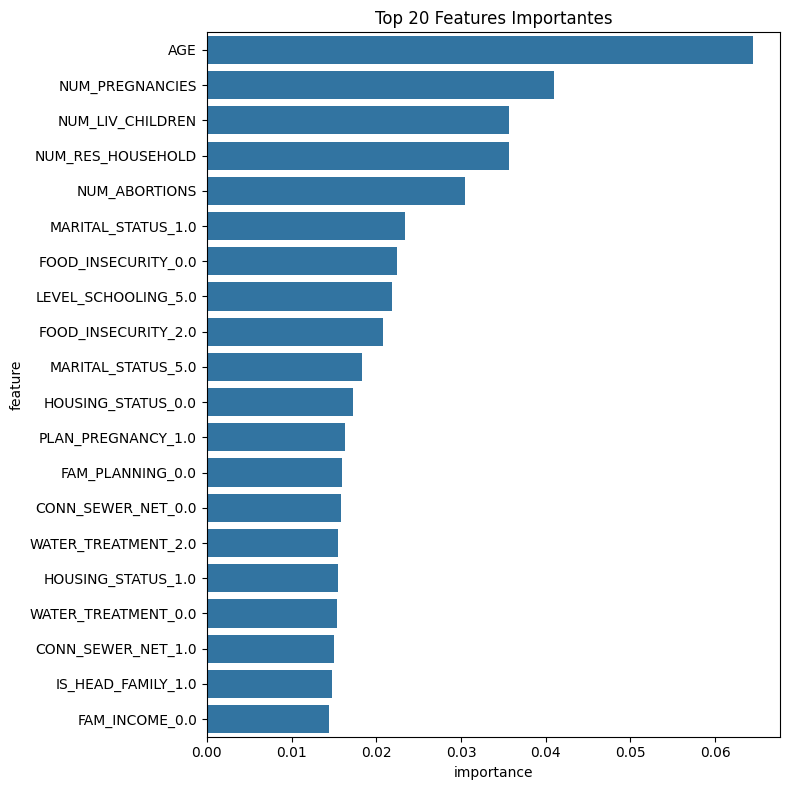

In [21]:
top = feat_imp.head(20)

plt.figure(figsize=(8, 8))
sns.barplot(data=top, x="importance", y="feature")
plt.title("Top 20 Features Importantes")
plt.tight_layout()

plt.savefig(REPORTS_DIR / "08_top20_feature_importance.png", dpi=300, bbox_inches="tight")  # NOVO
plt.savefig(TRENDZ_DIR / "dashboard_feature_importance.png", dpi=300, bbox_inches="tight")  # NOVO (dashboard exportado)

plt.show()


In [22]:
results = {
    "AUC": roc_auc,
    "Accuracy": (y_pred == y_test).mean(),
    "Precision_Positive": precision[recall.argmax()],
    "Recall_Positive": recall.max()
}

results_df = pd.DataFrame([results])
results_df
results_df.to_csv(REPORTS_DIR / "09_metricas_resumo.csv", index=False)  # NOVO
